<a href="https://colab.research.google.com/github/virf96/Coppel/blob/main/Semana_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencias

In [ ]:
import numpy as np
import pandas as pd

from datetime import date
from dateutil.relativedelta import relativedelta as rd

import os
import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from functools import reduce

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_ks_statistic,plot_roc_curve

from sklearn.model_selection import train_test_split,RandomizedSearchCV

from scipy.stats import ks_2samp,kruskal
from varclushi import VarClusHi

from auxiliares_diplo import freq

cf.go_offline()
pd.set_option('display.max_columns',None)


## Lectura de datos

In [ ]:
df = pd.read_pickle('churn_taxis_chicago.pkl')

In [ ]:
df.head()

,x_distancia_total_2,x_distancia_total_4,x_distancia_total_6,x_distancia_total_8,x_horas_por_dia_2,x_horas_por_dia_4,x_horas_por_dia_6,x_horas_por_dia_8,x_ingreso_total_2,x_ingreso_total_4,x_ingreso_total_6,x_ingreso_total_8,x_num_propinas_totales_2,x_num_propinas_totales_4,x_num_propinas_totales_6,x_num_propinas_totales_8,x_num_viajes_2,x_num_viajes_4,x_num_viajes_6,x_num_viajes_8,x_propinas_totales_2,x_propinas_totales_4,x_propinas_totales_6,x_propinas_totales_8,x_viajes_por_dia_2,x_viajes_por_dia_4,x_viajes_por_dia_6,x_viajes_por_dia_8,x_viajes_prom_semana_2,x_viajes_prom_semana_4,x_viajes_prom_semana_6,x_viajes_prom_semana_8,taxi_id,ancla,churn,xd_comp_2,xd_comp_4,xd_comp_6,xd_comp_8,xd_medio_de_pago_mas_usado_2,xd_medio_de_pago_mas_usado_4,xd_medio_de_pago_mas_usado_6,xd_medio_de_pago_mas_usado_8
0,0.0,0.0,0.0,0.0,3.394444,3.135833,2.928736,2.801905,2135.90,4228.80,5635.17,6498.38,86.0,183.0,236.0,265.0,184.0,395.0,542.0,617.0,268.65,494.30,615.17,681.43,20.444444,19.750000,18.689655,17.628571,92.0,98.75,90.333333,77.125000,0008de7a146802839c9e6059f482d292ebdae13c5c31dd...,7,0.0,Taxi Affiliation Services,Taxi Affiliation Services,Taxi Affiliation Services,Taxi Affiliation Services,Cash,Cash,Cash,Cash
1,0.0,0.0,0.0,0.0,0.007143,0.015432,0.010684,0.010684,1408.45,2747.50,3895.00,3895.00,80.0,141.0,189.0,189.0,85.0,147.0,198.0,198.0,226.95,435.50,615.50,615.50,6.071429,5.444444,5.076923,5.076923,42.5,36.75,33.000000,33.000000,0013da5489fe976daf4f4a7d246073ecf2caed9b12b3be...,7,0.0,OTROS,OTROS,OTROS,OTROS,Credit Card,Credit Card,Credit Card,Credit Card
2,415.9,755.9,1081.8,1215.0,2.563889,2.348611,2.338095,2.149612,2091.14,3849.99,5571.79,6244.12,67.0,136.0,198.0,216.0,179.0,329.0,498.0,563.0,166.64,332.74,492.54,541.37,14.916667,13.708333,14.228571,13.093023,89.5,82.25,83.000000,70.375000,015144a752b9107b088245604a99ce2dc0d0bd8bbd37e4...,7,0.0,Choice Taxi Association,Choice Taxi Association,Choice Taxi Association,Choice Taxi Association,Cash,Cash,Cash,Cash
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,27.25,27.25,48.00,70.25,72.0,140.0,1.0,2.0,1.0,1.0,3.0,5.0,0.00,0.00,2.00,3.00,1.000000,1.000000,1.500000,1.666667,1.0,1.00,1.500000,1.666667,02259c553cc670ea9465c2ec1387529275fe4ac321b705...,7,1.0,Suburban Dispatch LLC,Suburban Dispatch LLC,Suburban Dispatch LLC,Suburban Dispatch LLC,Credit Card,Credit Card,Credit Card,Credit Card
4,0.0,0.0,0.0,0.0,0.333333,0.173913,0.146190,0.142793,1748.35,2892.26,4186.52,4223.00,98.0,179.0,239.0,241.0,114.0,206.0,273.0,277.0,246.45,421.06,635.82,640.05,9.500000,8.956522,7.800000,7.486486,57.0,51.50,45.500000,39.571429,02ef8f01232b1b1828f4e5e1b8e8a85cd71b67c449afaf...,7,0.0,Chicago Elite Cab Corp. (Chicago Carriag,Chicago Elite Cab Corp. (Chicago Carriag,Chicago Elite Cab Corp. (Chicago Carriag,Chicago Elite Cab Corp. (Chicago Carriag,Credit Card,Credit Card,Credit Card,Credit Card


## Variables

In [ ]:
best= ['x_propinas_totales_6',
'x_viajes_por_dia_6',
'x_distancia_total_4',
'x_num_propinas_totales_4']

In [ ]:
tgt = ['churn']
um = ['taxi_id','ancla']

In [ ]:
df[um+best+tgt]

,taxi_id,ancla,x_propinas_totales_6,x_viajes_por_dia_6,x_distancia_total_4,x_num_propinas_totales_4,churn
0,0008de7a146802839c9e6059f482d292ebdae13c5c31dd...,7,615.17,18.689655,0.00,183.0,0.0
1,0013da5489fe976daf4f4a7d246073ecf2caed9b12b3be...,7,615.50,5.076923,0.00,141.0,0.0
2,015144a752b9107b088245604a99ce2dc0d0bd8bbd37e4...,7,492.54,14.228571,755.90,136.0,0.0
3,02259c553cc670ea9465c2ec1387529275fe4ac321b705...,7,2.00,1.500000,0.00,140.0,1.0
4,02ef8f01232b1b1828f4e5e1b8e8a85cd71b67c449afaf...,7,635.82,7.800000,0.00,179.0,0.0
...,...,...,...,...,...,...,...
10911,1ad345f9ed839da1c0156fea6a7bfaf332bd84306912df...,50,764.83,11.783784,958.25,140.0,1.0
10912,289d6aefe656e66f0186e9f8bca204c795d8d47be5d0a8...,50,764.83,11.783784,958.25,140.0,1.0
10913,ab44501ecc8f9ff89c3550d26b04014a7f70640b0691cf...,50,764.83,11.783784,958.25,140.0,1.0
10914,c7475fec1fa338d525948b60cc20c8a47905a257c68ef8...,50,764.83,11.783784,958.25,140.0,1.0


## Cambio de espacio

### Espacio Natural $\mathcal{X}\in\mathbb{R}^4$

In [ ]:
sc = MinMaxScaler()

In [ ]:
sc.fit(df[best])

MinMaxScaler()

In [ ]:
X = pd.DataFrame(sc.transform(df[best]),columns=best)
X[um] = df[um]
X[tgt] = df[tgt]

### Componentes principales $\mathcal{X}\to\mathcal{X}_p$

In [ ]:
pi_pca = make_pipeline(StandardScaler(),PCA())
pi_pca.fit(X[best])
Xp = pd.DataFrame(pi_pca.transform(X[best]),columns=[f'd%i'%(i+1) for i in range(len(best))])
Xp[um] = df[um]
Xp[tgt] = df[tgt]
Xp[tgt[0]].replace({0:'No Fuga',1:'Fuga'},inplace=True)
Xp.head()

,d1,d2,d3,d4,taxi_id,ancla,churn
0,0.342214,-1.503209,0.794647,-0.012442,0008de7a146802839c9e6059f482d292ebdae13c5c31dd...,7,No Fuga
1,-1.000987,-0.829444,-0.660418,-0.057641,0013da5489fe976daf4f4a7d246073ecf2caed9b12b3be...,7,No Fuga
2,-0.044247,-0.169373,0.597247,-0.169092,015144a752b9107b088245604a99ce2dc0d0bd8bbd37e4...,7,No Fuga
3,-2.045873,-0.623920,-0.300404,-1.099763,02259c553cc670ea9465c2ec1387529275fe4ac321b705...,7,Fuga
4,-0.494916,-1.162540,-0.502510,-0.300019,02ef8f01232b1b1828f4e5e1b8e8a85cd71b67c449afaf...,7,No Fuga


In [ ]:
pi_pca.steps[-1][-1].explained_variance_ratio_.cumsum()##Varianza explicada por los componentes

array([0.69292927, 0.84589721, 0.92911579, 1.        ])

In [ ]:
Xp.iplot(kind='scatter',x='d1',y='d2',categories=tgt[0],mode='markers')

/home/jose/entornos/ins/lib/python3.8/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/jose/entornos/ins/lib/python3.8/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [ ]:
Xp.sample(frac=0.1).iplot(kind='scatter3d',x='d1',y='d2',z='d3',categories=tgt[0],mode='markers')

### Escalamiento Multidimensional

In [ ]:
mds = MDS(n_components=2,n_jobs=-1)
x = df.sample(1000).reset_index(drop=True)
Xm = pd.DataFrame(mds.fit_transform(x[best]),columns=['d1','d2'])
Xm[um] = x[um]
Xm[tgt] = x[tgt]
Xm[tgt[0]].replace({0:'No Fuga',1:'Fuga'},inplace=True)
Xm.head()

,d1,d2,taxi_id,ancla,churn
0,-217.102110,454.189975,c51a860a4716b6a9e4529f8270d895478e79b5369d3fc2...,17,No Fuga
1,1023.216630,-345.720380,6c2f2014ddf187bf16cddf5b7e3ceacf84f5cb3ce59758...,43,No Fuga
2,-118.618601,215.733931,0423a2c129f6c40cb6fa76d3c75d1ccfabf46419f5de47...,29,No Fuga
3,-210.288180,-236.646696,be6e132cb81dc67a9a57334ddff99eda582058219760a4...,49,No Fuga
4,660.608421,-641.065385,e88bf49a9bb5b04a354628076eed4fcffc39fc2632a5bb...,21,No Fuga


In [ ]:
Xm.iplot(kind='scatter',x='d1',y='d2',categories=tgt[0],mode='markers')

/home/jose/entornos/ins/lib/python3.8/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/jose/entornos/ins/lib/python3.8/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



## Partición

In [ ]:
Xt,Xv,yt,yv = train_test_split(X[um+best],X[um+tgt],train_size=0.7)

In [ ]:
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
yt.reset_index(drop=True,inplace=True)
yv.reset_index(drop=True,inplace=True)

## Clasificadores

### Regresión Logística

In [ ]:
modelo = LogisticRegression()

In [ ]:
modelo.fit(Xt[best],yt[tgt[0]])

LogisticRegression()

#### Vector de parámetros $\vec{\theta}$

In [ ]:
modelo.coef_

array([[-5.81803827, -1.50233361,  0.67014914,  2.28240826]])

#### Sesgo $\theta_0$

In [ ]:
modelo.intercept_

array([-0.33459982])

#### Metrícas de ajuste

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

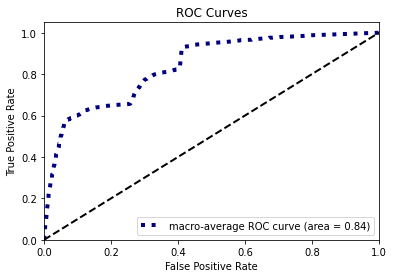

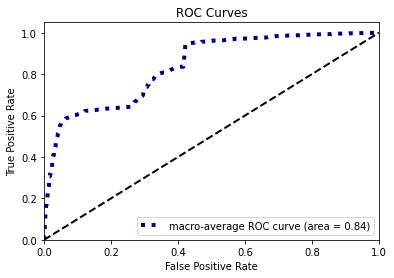

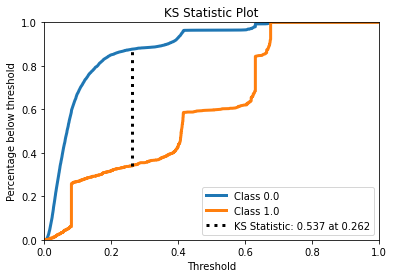

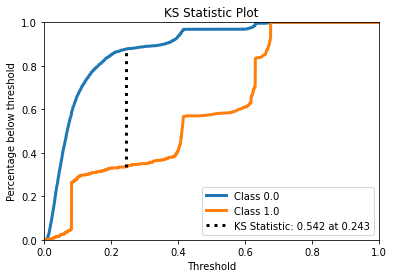

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]])

#### Híperparametrización

In [ ]:
gradilla_hp = dict(penalty = ['l1', 'l2', 'elasticnet', 'none'],
C = np.arange(0.01,2,0.01),
class_weight = [None,'balanced'])

grid = RandomizedSearchCV(cv=3,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=20)

grid.fit(Xt[best],yt[tgt[0]])

modelo = grid.best_estimator_
modelo

grid.best_params_

grid.best_score_

modelo.fit(Xt[best],yt[tgt[0]])

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning:

One or more of the test scores are non-finite: [0.83981531 0.83657376 0.84125192 0.83657376 0.83812136 0.84129624
 0.84161354        nan        nan        nan        nan        nan
 0.83786308 0.8406648         nan        nan        nan 0.84209787
 0.8406648  0.8406648 ]



LogisticRegression(C=0.3, class_weight='balanced')

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

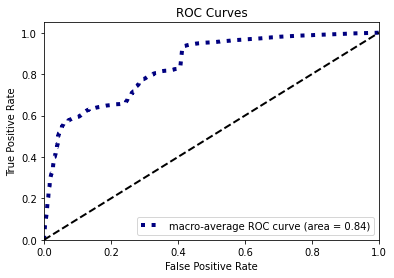

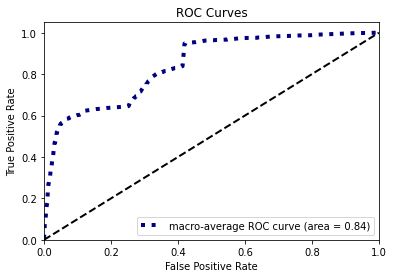

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]],curves='macro')

### Máquina vector soporte

In [ ]:
modelo = SVC(probability=True)

In [ ]:
modelo.fit(Xt[best],yt[tgt[0]])

SVC(probability=True)

#### Métricas de ajuste

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

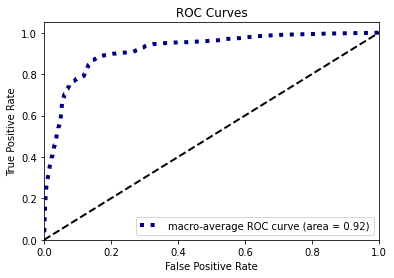

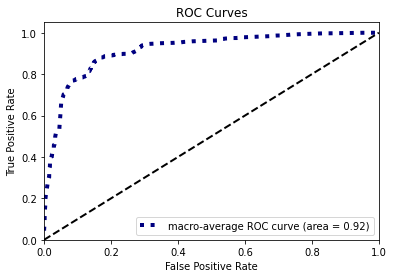

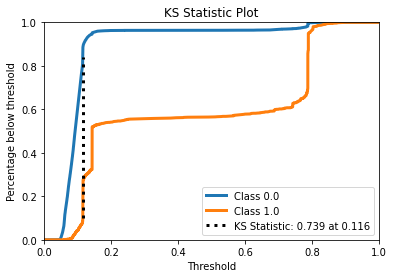

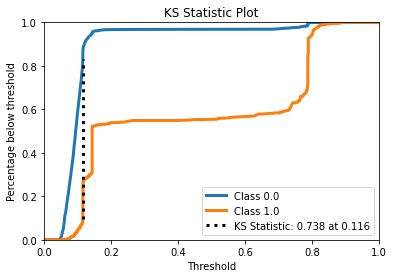

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]])

#### Híperparametrización

In [ ]:
gradilla_hp = dict(kernel = ['linear', 'poly', 'rbf', 'sigmoid'],
C = np.arange(0.01,2,0.01))

grid = RandomizedSearchCV(cv=3,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=10)

grid.fit(Xt[best],yt[tgt[0]])

modelo = grid.best_estimator_

print(grid.best_params_)

print(grid.best_score_)

modelo.fit(Xt[best],yt[tgt[0]])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'kernel': 'rbf', 'C': 1.81}
0.9121538632278862


SVC(C=1.81, probability=True)

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

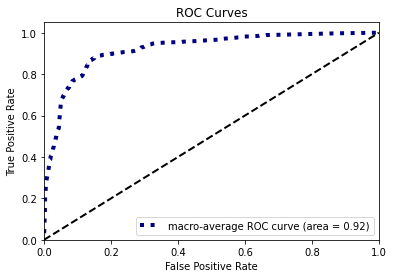

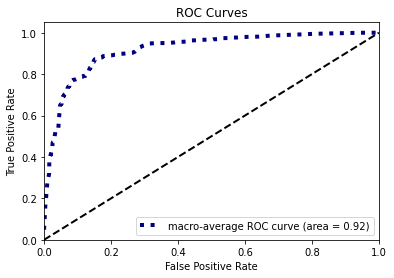

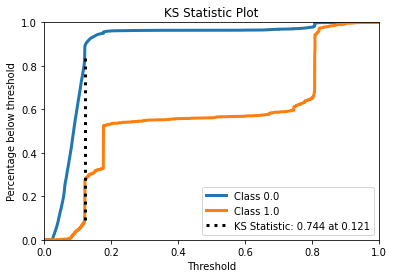

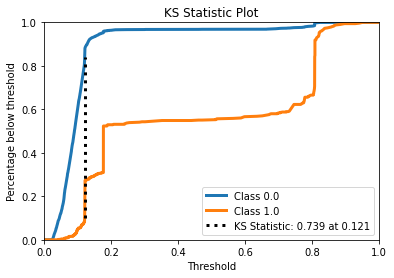

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]])

### Red Neuronal

In [ ]:
modelo = MLPClassifier()
modelo.fit(Xt[best],yt[tgt[0]])

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier()

#### Métricas de Ajuste

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

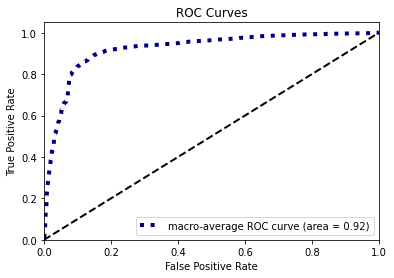

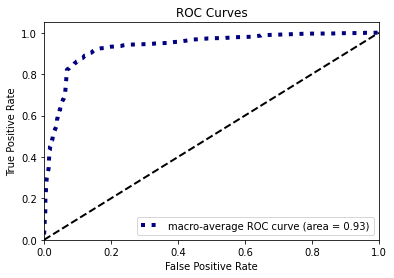

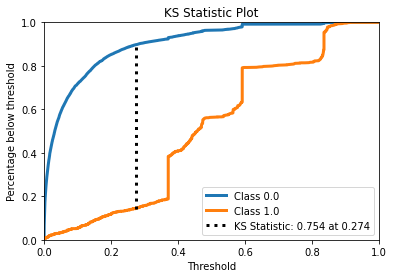

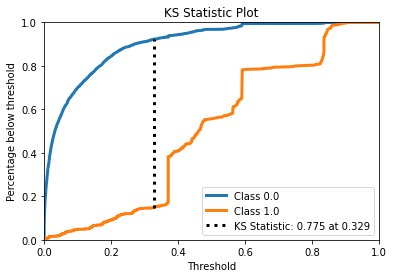

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]])

#### Híperparametrización

In [ ]:
gradilla_hp = dict(hidden_layer_sizes = [(a,b,c,) for a in range(10,100,10) for b in range(10,100,10) for c in range(10,100,10)] ,
activation = ['identity', 'logistic', 'tanh', 'relu'],
learning_rate = ['constant', 'invscaling', 'adaptive'],
max_iter=[1000])

grid = RandomizedSearchCV(cv=3,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=3)

grid.fit(Xt[best],yt[tgt[0]])

modelo = grid.best_estimator_
modelo

grid.best_params_

grid.best_score_

modelo.fit(Xt[best],yt[tgt[0]])

Fitting 3 folds for each of 3 candidates, totalling 9 fits


MLPClassifier(hidden_layer_sizes=(90, 70, 90), max_iter=1000)

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

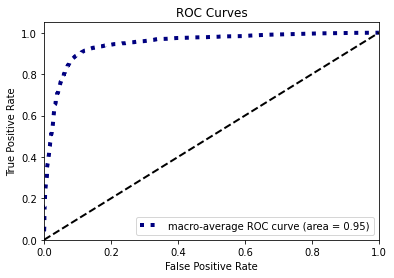

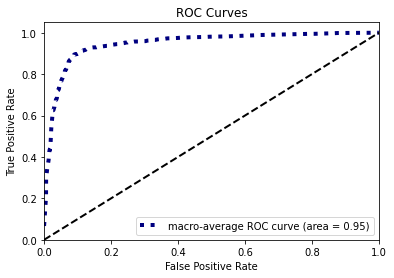

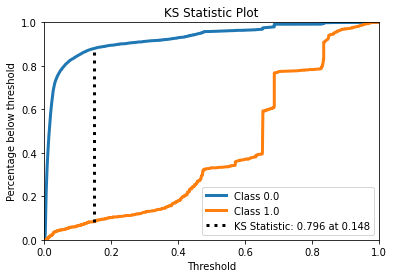

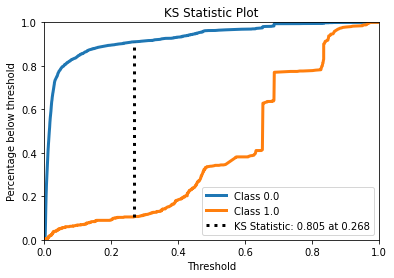

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]])

### Bosque Aleatorio

In [ ]:
modelo = RandomForestClassifier()
modelo.fit(Xt[best],yt[tgt[0]])

RandomForestClassifier()

#### Métricas de ajuste

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

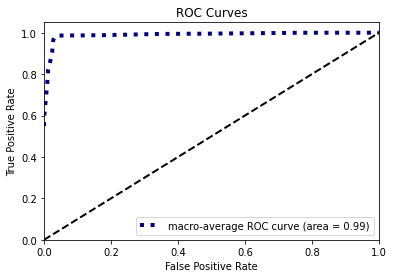

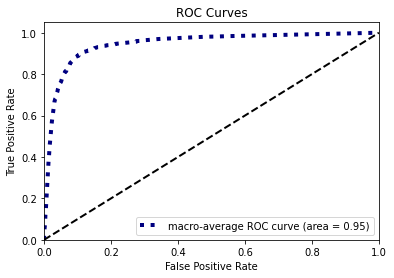

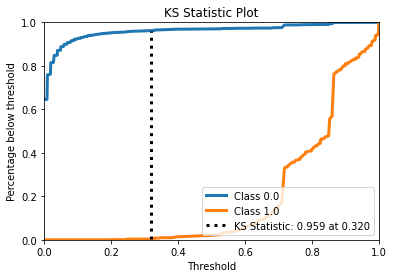

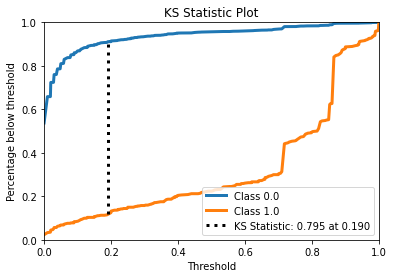

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]])

#### Híperparametrización

In [ ]:
gradilla_hp = dict(n_estimators = range(10,200,10),
                   criterion = ["gini", "entropy"],
                   max_depth = range(2,10)
                  )

grid = RandomizedSearchCV(cv=3,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=20)

grid.fit(Xt[best],yt[tgt[0]])

modelo = grid.best_estimator_

print(grid.best_params_)

print(grid.best_score_)

modelo.fit(Xt[best],yt[tgt[0]])

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 180, 'max_depth': 8, 'criterion': 'entropy'}
0.9459305257308935


RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=180)

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

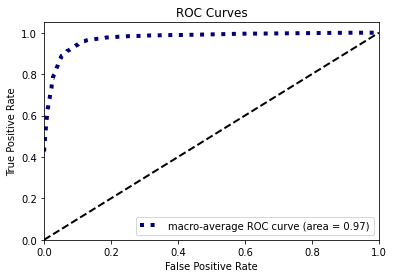

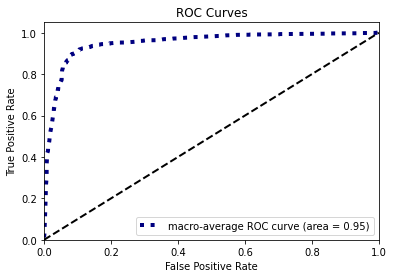

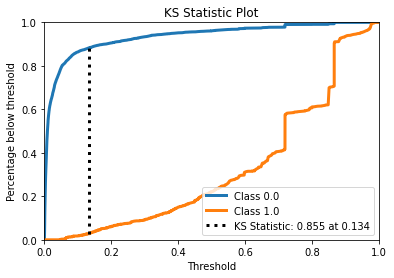

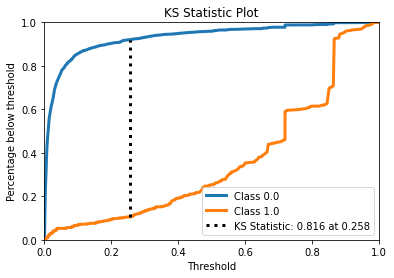

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]])

### Árbol de Decisión

In [ ]:
modelo = DecisionTreeClassifier()
modelo.fit(Xt[best],yt[tgt[0]])

DecisionTreeClassifier()

#### Métricas de ajuste

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

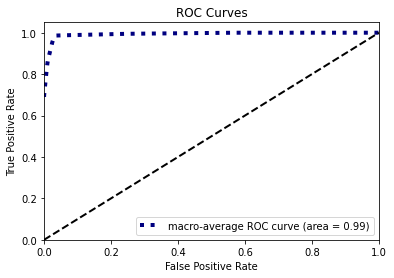

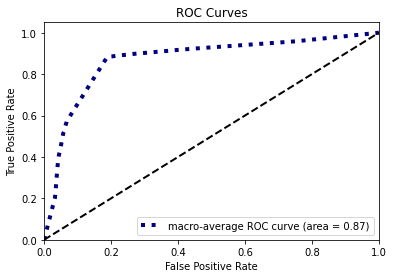

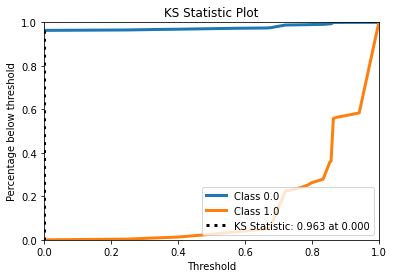

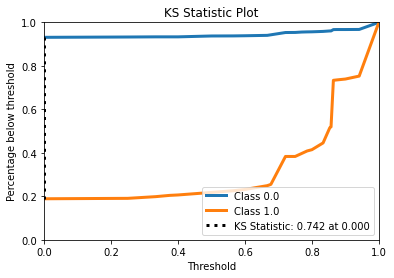

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]])

#### Híperparametrización

In [ ]:
gradilla_hp = dict(
                   criterion = ["gini", "entropy"],
                   max_depth = range(2,10)
                  )

grid = RandomizedSearchCV(cv=3,verbose=True,
                          estimator=modelo,
                          n_jobs=-1,
                          scoring='roc_auc',
                          param_distributions=gradilla_hp,
                          n_iter=20)

grid.fit(Xt[best],yt[tgt[0]])

modelo = grid.best_estimator_

print(grid.best_params_)

print(grid.best_score_)

modelo.fit(Xt[best],yt[tgt[0]])

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning:

The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.



Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'max_depth': 5, 'criterion': 'entropy'}
0.9317426143460783


DecisionTreeClassifier(criterion='entropy', max_depth=5)

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.

/home/jose/entornos/ins/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

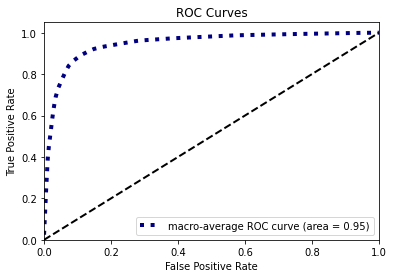

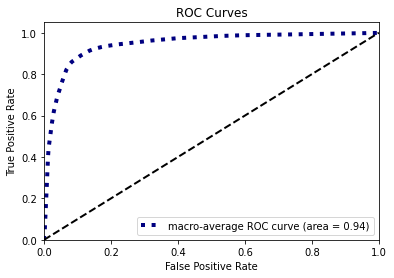

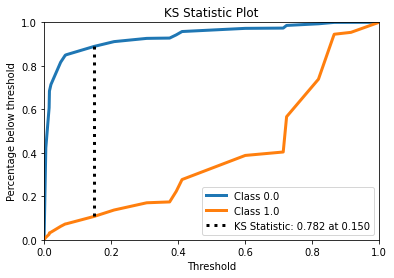

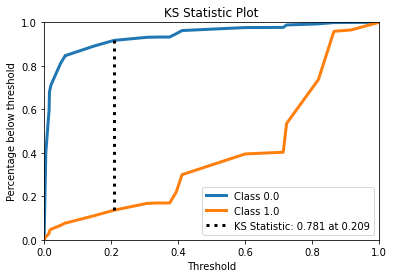

In [ ]:
plot_roc_curve(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]],curves='macro')
plot_roc_curve(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]],curves='macro')

plot_ks_statistic(y_probas=modelo.predict_proba(Xt[best]),y_true=yt[tgt[0]])
plot_ks_statistic(y_probas=modelo.predict_proba(Xv[best]),y_true=yv[tgt[0]])

In [ ]:
from sklearn.tree import plot_tree

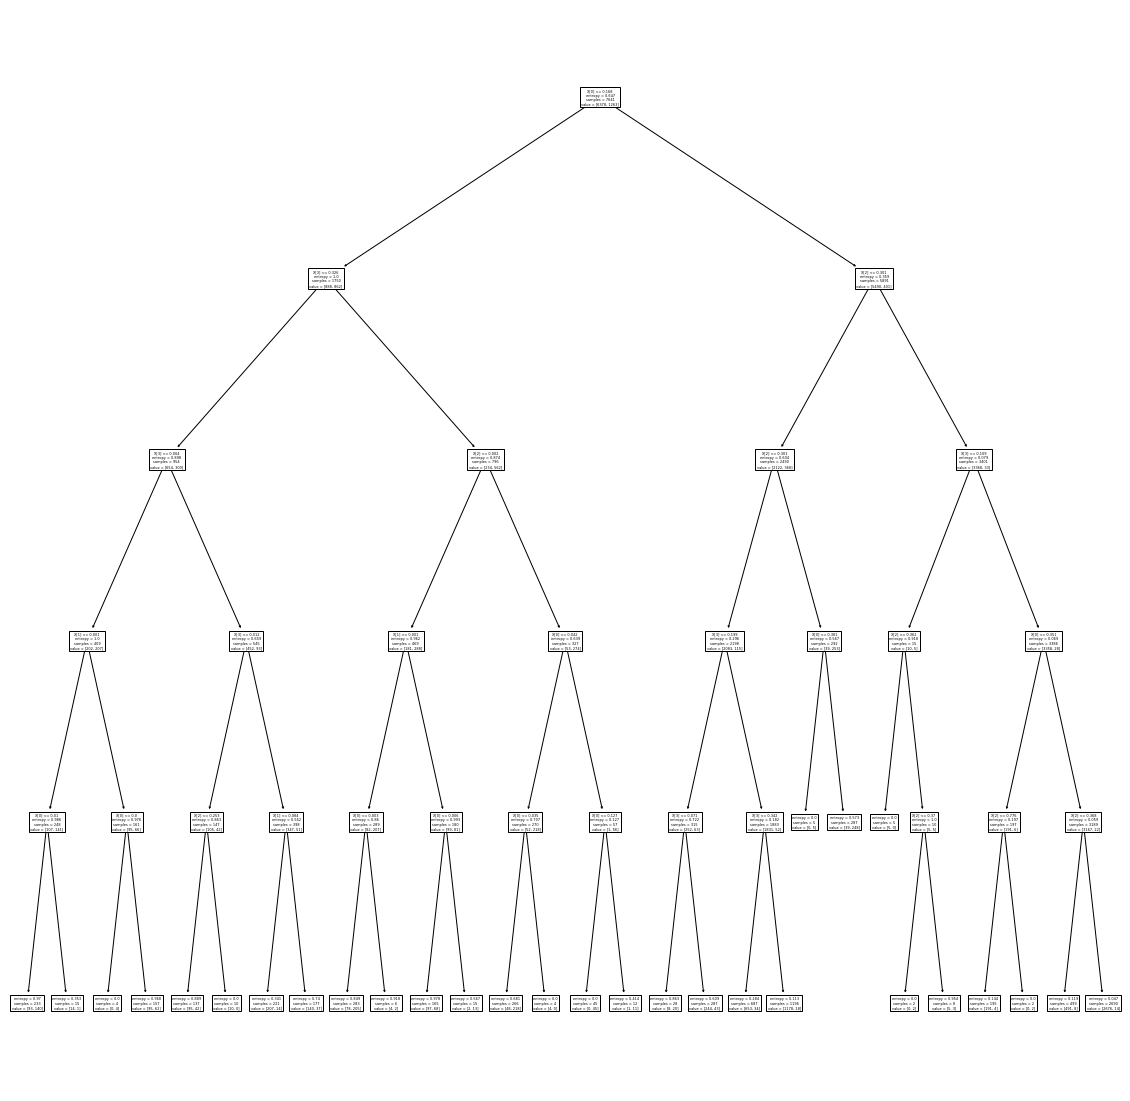

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(modelo)

plt.show()

## Ganadores

In [ ]:
l = [LogisticRegression(C=0.3, class_weight='balanced'),
SVC(C=1.81, probability=True),
MLPClassifier(hidden_layer_sizes=(90, 70, 90), max_iter=1000),
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=180),
DecisionTreeClassifier(criterion='entropy', max_depth=5)

]

In [ ]:
def metricas(Xt,Xv,yt,yv,modelo):
    return roc_auc_score(y_true=yt[tgt[0]],y_score=modelo.predict_proba(Xt[best])[:,1]),roc_auc_score(y_true=yv[tgt[0]],y_score=modelo.predict_proba(Xv[best])[:,1])

In [ ]:
for m in l:
    m.fit(Xt[best],yt[tgt[0]])

In [ ]:
list(map(lambda m:metricas(Xt,Xv,yt,yv,m),l))

[(0.8423645265159556, 0.8423698203295767),
 (0.9198227428161978, 0.9178415450331677),
 (0.9513465726280487, 0.9469588924105491),
 (0.9735498386550958, 0.9491351889928789),
 (0.9466500418228039, 0.9441008516341427)]

In [ ]:
modelo = l[3]

In [ ]:
Xt['p'] = pd.cut(modelo.predict_proba(Xt[best])[:,1],bins=np.arange(0,1.1,0.1),include_lowest=True).astype(str)
Xv['p'] = pd.cut(modelo.predict_proba(Xv[best])[:,1],bins=np.arange(0,1.1,0.1),include_lowest=True).astype(str)
aux = pd.concat([Xt[um+['p']].merge(yt,on=um,how='inner').assign(muestra='ent'),Xv[um+['p']].merge(yv,on=um,how='inner').assign(muestra='val')],ignore_index=True)

In [ ]:
aux.pivot_table(index=['p','muestra'],columns=tgt[0],values=um[0],aggfunc='count').to_clipboard()

## Estimación económica

In [ ]:
df = pd.read_pickle('churn_taxis_chicago.pkl')

In [ ]:
(df.filter(like='ingreso_total').describe().T[['mean']]/np.array([2,4,6,8]).reshape(4,1))

,mean
x_ingreso_total_2,1251.375080
x_ingreso_total_4,1176.948362
x_ingreso_total_6,1127.877514
x_ingreso_total_8,1082.868509


In [ ]:
df[['x_ingreso_total_8','x_num_viajes_8']]
(df['x_ingreso_total_8']/df['x_num_viajes_8']).describe()

count    10916.000000
mean        22.102667
std         16.851733
min          2.500000
25%         13.972274
50%         17.481844
75%         24.214630
max        327.500000
dtype: float64

In [ ]:
22*5

110